# Behavioral Lab 3

Welcome to our third lab! 

Last week, we discussed the SIR model that was commonly used in the epidemiology, and we also tried to code the model in our lab 2 to practice using functions in Python.

Life is more complicated in reality, and we would like to take a look of the real-life data first. You may have a better understanding of why the SIR model is not realistic. But before conducting any analysis using the real-life data, we will learn to import data and do some basic plotting in today's lab.

### Today's lab

* Data import
* Data description and simple manipulation
* Plotting

# 1. Data import and manipulation


## 1.1 Data Import 

Before we start to explore if people's response to the environment (broadly speaking, other people's acticities form the nearby and broad environment for you), we first move from simulation to real-data issues.

### 1.1.1 Import online data

Recall that we showed the data import with the following method in Lab 1:

In [1]:
from urllib.request import urlopen 
import re # re — Regular expression operations
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

If we are trying to open a webpage using `urllib.request.urlopen()`, then it's likely to give us the following error:

TypeError: can't use a string pattern on a bytes-like object

Basically, `urllib.request.urlopen()` returns a bytestream, so `re` doesn't know the encoding to use. What are we supposed to do in this situation? Is there a way to specify the encoding method in a urlrequest?

After you make a request `req = urllib.request.urlopen(...)` you have to read the request by calling `html_string = req.read()` that will give you the string response that you can then parse the way you want.

Then you can use `.decode()`, such as `.decode('utf-8')`.


The most common use for `re` is to search for patterns in text. 

The regular expression "\s+" means one or more whitespaces. A backslash followed by anything else means something special. In Java and some other programming languages, a backslash can be interpreted as part of the string itself and not part of the regular expression. "\\s+" gives you a string containing your desired re, while "\s+" might cause a compile error because \s isn't a valid Java string escape sequence.

In [2]:
nyt_url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
nyt_data = read_url(nyt_url)

**NOTE** If we read the url directly, instead of getting a nice table, we will get a pile of words and numbers mixed together. If you don't believe this, run the following cell (remove #) to see, although it will take lots of time (and more time if you want to export the file as a pdf or a ipynb file (so do not do this for future homework assignments). This would be hard for us to visualize and analyze data direcly.

In [3]:
# A better way we experienced before is using pandas
import numpy as np
import pandas as pd

from scipy.integrate import odeint
import matplotlib.pyplot as plt
# sep=',' in the parentheses allow the data to be splitted by comma.
nyt_pddata = pd.read_csv(nyt_url,sep=",")

In [4]:
nyt_pddata

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
1056746,2021-02-22,Sweetwater,Wyoming,56037.0,3686,34.0
1056747,2021-02-22,Teton,Wyoming,56039.0,3331,9.0
1056748,2021-02-22,Uinta,Wyoming,56041.0,2030,12.0
1056749,2021-02-22,Washakie,Wyoming,56043.0,878,26.0


This is a dataset showing the COVID daily cases and deaths in each US county. For each county, it starts documenting when the first case showed up, so you may notice that each county has a different date to start with. 

### 1.1.2. Import a local data

In [5]:
cases_tah = pd.read_csv('YData_SDS177/nyt_cases_name.csv')

In [6]:
cases_tah

,geoid,county,state,cases,deaths,date,dwell_time
0,1001,Autauga,AL,0,0,01jan2020,929.95764
1,1003,Baldwin,AL,0,0,01jan2020,857.86395
2,1005,Barbour,AL,0,0,01jan2020,788.39636
3,1007,Bibb,AL,0,0,01jan2020,913.77106
4,1009,Blount,AL,0,0,01jan2020,956.05914
...,...,...,...,...,...,...,...
456283,56045,Weston,WY,0,0,22may2020,463.05606
456284,56045,Weston,WY,0,0,23may2020,335.37607
456285,56045,Weston,WY,0,0,24may2020,320.40112
456286,56045,Weston,WY,0,0,25may2020,402.71588


## 1.2 Checking the dataset

This is usually used to get a general understanding of datasets that you first obtain. You may want to know the size of the dataset, the summary statistics of the dataset, etc.

In [7]:
cases_tah.shape # the size of the dataset

(456288, 7)

In [8]:
cases_tah.describe() # mean/min/max  for numerical value

,geoid,cases,deaths,dwell_time
count,456288.000000,456288.000000,456288.000000,456288.000000
mean,30644.804446,124.558121,6.941337,637.242971
std,14972.075712,2053.609837,186.485799,159.504740
min,1001.000000,0.000000,0.000000,0.000000
25%,19042.500000,0.000000,0.000000,542.553255
50%,29208.000000,0.000000,0.000000,640.782900
75%,45319.000000,7.000000,0.000000,734.284198
max,56045.000000,204111.000000,20795.000000,1438.000000


In [9]:
cases_tah.head(3)

,geoid,county,state,cases,deaths,date,dwell_time
0,1001,Autauga,AL,0,0,01jan2020,929.95764
1,1003,Baldwin,AL,0,0,01jan2020,857.86395
2,1005,Barbour,AL,0,0,01jan2020,788.39636


In [10]:
cases_tah.loc[4] # selecting row 5

# Why it's row 5? Note that the row started from row 0.

geoid              1009
county           Blount
state                AL
cases                 0
deaths                0
date          01jan2020
dwell_time      956.059
Name: 4, dtype: object

In [11]:
cases_tah.loc[4,'date']

'01jan2020'

In [12]:
cases_tah.loc[range(4,10)] # Why the range is 4-9 below? 

,geoid,county,state,cases,deaths,date,dwell_time
4,1009,Blount,AL,0,0,01jan2020,956.05914
5,1011,Bullock,AL,0,0,01jan2020,710.70667
6,1013,Butler,AL,0,0,01jan2020,813.13367
7,1015,Calhoun,AL,0,0,01jan2020,837.67346
8,1017,Chambers,AL,0,0,01jan2020,875.58191
9,1019,Cherokee,AL,0,0,01jan2020,820.60223


Note, the range(a,b) is showing `[a,b)`

## 1.3 Basic operations

### 1.3.1 logical operations

In [13]:
# selecting only CT observants

cases_tah_CT = cases_tah[cases_tah['state'] == 'CT']
cases_tah_CT 

,geoid,county,state,cases,deaths,date,dwell_time
279,9001,Fairfield,CT,0,0,01jan2020,741.51093
280,9003,Hartford,CT,0,0,01jan2020,745.36816
281,9005,Litchfield,CT,0,0,01jan2020,735.46960
282,9007,Middlesex,CT,0,0,01jan2020,761.88977
283,9009,New Haven,CT,0,0,01jan2020,741.86902
...,...,...,...,...,...,...,...
45001,9015,Windham,CT,348,14,22may2020,620.14008
45002,9015,Windham,CT,354,14,23may2020,686.85559
45003,9015,Windham,CT,359,14,24may2020,682.95496
45004,9015,Windham,CT,365,14,25may2020,693.06555


Use `&` to indicate multiple logical operations:

In [14]:
# selecting based on multiple conditions 

cases_tah[(cases_tah['state'] == 'CT') & (cases_tah['cases'] > 0)]

,geoid,county,state,cases,deaths,date,dwell_time
43904,9001,Fairfield,CT,1,0,08mar2020,618.84271
43905,9001,Fairfield,CT,2,0,09mar2020,509.19855
43906,9001,Fairfield,CT,2,0,10mar2020,570.49030
43907,9001,Fairfield,CT,3,0,11mar2020,576.92316
43908,9001,Fairfield,CT,5,0,12mar2020,583.74542
...,...,...,...,...,...,...,...
45001,9015,Windham,CT,348,14,22may2020,620.14008
45002,9015,Windham,CT,354,14,23may2020,686.85559
45003,9015,Windham,CT,359,14,24may2020,682.95496
45004,9015,Windham,CT,365,14,25may2020,693.06555


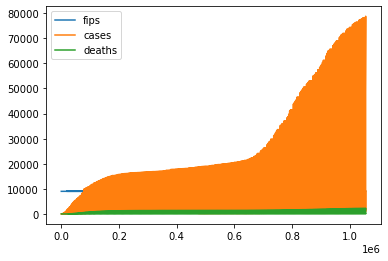

In [15]:
nyt_pddata[(nyt_pddata['state'] == 'Connecticut') & (nyt_pddata['cases'] > 0)].plot()

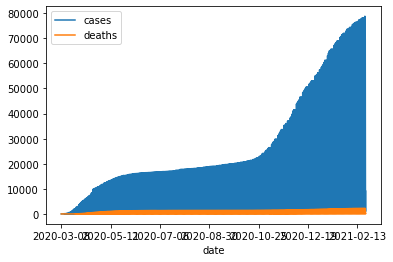

In [16]:
nyt_pddata[(nyt_pddata['state'] == 'Connecticut') & (nyt_pddata['cases'] > 0)].plot(x='date',y=['cases','deaths'])
# plt.xticks(rotation = 45)
# plt.yticks(rotation = 45)

### 1.3.2 Counting occurrences

In [17]:
nyt_pddata['state'].value_counts()

Texas                       80464
Georgia                     53689
Virginia                    43935
Kentucky                    39172
Missouri                    37534
Illinois                    33667
North Carolina              33309
Iowa                        32570
Kansas                      32479
Tennessee                   31999
Indiana                     30946
Ohio                        29506
Minnesota                   28723
Michigan                    27822
Mississippi                 27600
Nebraska                    27512
Oklahoma                    25214
Arkansas                    25212
Wisconsin                   23951
Puerto Rico                 23242
Florida                     23102
Pennsylvania                22626
Alabama                     22497
Louisiana                   21978
Colorado                    21047
South Dakota                20182
New York                    19882
California                  19875
West Virginia               17761
North Dakota  

### 1.3.3. Sorting

In [18]:
cases_tah.sort_values(by ='dwell_time',ascending = False).head(5)

,geoid,county,state,cases,deaths,date,dwell_time
38543,8053,Hinsdale,CO,3,0,18apr2020,1438.0
234091,30037,Golden Valley,MT,0,0,17jan2020,1438.0
236436,30069,Petroleum,MT,0,0,26jan2020,1438.0
38537,8053,Hinsdale,CO,2,0,12apr2020,1430.0
234162,30037,Golden Valley,MT,0,0,28mar2020,1403.0


In [19]:
cases_tah.sort_values(by ='date',ascending = True)

,geoid,county,state,cases,deaths,date,dwell_time
224530,29135,Moniteau,MO,2,0,01apr2020,825.66455
155618,21171,Monroe,KY,0,0,01apr2020,847.83801
220004,29073,Gasconade,MO,1,0,01apr2020,649.77307
415498,51079,Greene,VA,1,0,01apr2020,688.15088
155764,21173,Montgomery,KY,5,0,01apr2020,692.90381
...,...,...,...,...,...,...,...
446011,55049,Iowa,WI,3,0,31mar2020,743.46790
125541,19167,Sioux,IA,4,0,31mar2020,511.33047
431557,53039,Klickitat,WA,7,1,31mar2020,761.89075
207301,28063,Jefferson,MS,1,0,31mar2020,598.41479


It did not recognize `date` as a column of real dates, but treat them as strings. And it orders 01apr2020 before 01jan2020 because "a" is in front of "j".

To modify the data format, there is an easy way to do it under pandas:

In [20]:
cases_tah.date = pd.to_datetime(cases_tah.date)
cases_tah

,geoid,county,state,cases,deaths,date,dwell_time
0,1001,Autauga,AL,0,0,2020-01-01,929.95764
1,1003,Baldwin,AL,0,0,2020-01-01,857.86395
2,1005,Barbour,AL,0,0,2020-01-01,788.39636
3,1007,Bibb,AL,0,0,2020-01-01,913.77106
4,1009,Blount,AL,0,0,2020-01-01,956.05914
...,...,...,...,...,...,...,...
456283,56045,Weston,WY,0,0,2020-05-22,463.05606
456284,56045,Weston,WY,0,0,2020-05-23,335.37607
456285,56045,Weston,WY,0,0,2020-05-24,320.40112
456286,56045,Weston,WY,0,0,2020-05-25,402.71588


In [21]:
cases_tah.sort_values(by ='date',ascending = True)

,geoid,county,state,cases,deaths,date,dwell_time
0,1001,Autauga,AL,0,0,2020-01-01,929.95764
2063,39109,Miami,OH,0,0,2020-01-01,812.92145
2064,39111,Monroe,OH,0,0,2020-01-01,676.85876
2065,39113,Montgomery,OH,0,0,2020-01-01,775.34802
2066,39115,Morgan,OH,0,0,2020-01-01,630.37836
...,...,...,...,...,...,...,...
392485,48355,Nueces,TX,266,3,2020-05-26,585.16980
102091,18029,Dearborn,IN,164,21,2020-05-26,670.97052
285759,37159,Rowan,NC,612,32,2020-05-26,617.17706
286343,37167,Stanly,NC,53,4,2020-05-26,669.62256


Now the results are better sorted.

### 1.3.4. Adding new column to the existing DataFrame in Pandas

In [22]:
cases_tah['logcase'] = np.log(cases_tah['cases'] + 1)
cases_tah

,geoid,county,state,cases,deaths,date,dwell_time,logcase
0,1001,Autauga,AL,0,0,2020-01-01,929.95764,0.0
1,1003,Baldwin,AL,0,0,2020-01-01,857.86395,0.0
2,1005,Barbour,AL,0,0,2020-01-01,788.39636,0.0
3,1007,Bibb,AL,0,0,2020-01-01,913.77106,0.0
4,1009,Blount,AL,0,0,2020-01-01,956.05914,0.0
...,...,...,...,...,...,...,...,...
456283,56045,Weston,WY,0,0,2020-05-22,463.05606,0.0
456284,56045,Weston,WY,0,0,2020-05-23,335.37607,0.0
456285,56045,Weston,WY,0,0,2020-05-24,320.40112,0.0
456286,56045,Weston,WY,0,0,2020-05-25,402.71588,0.0


In [23]:
# Check if the logcase is calculated correctly by observing the positive cases:

cases_tah[cases_tah['cases']>0]

,geoid,county,state,cases,deaths,date,dwell_time,logcase
3186,1001,Autauga,AL,1,0,2020-03-24,830.25403,0.693147
3187,1001,Autauga,AL,4,0,2020-03-25,827.82336,1.609438
3188,1001,Autauga,AL,6,0,2020-03-26,841.66962,1.945910
3189,1001,Autauga,AL,6,0,2020-03-27,873.96906,1.945910
3190,1001,Autauga,AL,6,0,2020-03-28,986.47754,1.945910
...,...,...,...,...,...,...,...,...
456137,56043,Washakie,WY,19,1,2020-05-22,575.32990,2.995732
456138,56043,Washakie,WY,20,1,2020-05-23,542.39172,3.044522
456139,56043,Washakie,WY,20,1,2020-05-24,565.30212,3.044522
456140,56043,Washakie,WY,30,1,2020-05-25,548.37018,3.433987


### 1.3.5. Grouping Data

In [24]:
nyt_pddata.groupby('state')

Without specifying `.mean()` or `.sum()` would not provide us the dataset we need.

In [25]:
nyt_pddata.groupby('state').mean().head(3)

,fips,cases,deaths
state,,,
Alabama,1067.150420,2473.344624,40.409077
Alaska,2201.488153,698.240937,3.228483
Arizona,4013.906202,16360.008277,329.562656


In [26]:
nyt_pddata.groupby('state').mean().sort_values(by='cases', ascending = True).head(5)

,fips,cases,deaths
state,,,
Northern Mariana Islands,69115.000000,37.696970,1.094276
Vermont,50014.011378,228.027936,5.022624
Virgin Islands,78020.000000,308.885455,4.341818
West Virginia,54055.151135,605.750239,10.420584
Maine,23015.944589,615.836074,11.424757


# 2. Plot

We did some plot already, let's summarize them here systematically.

## 2.1. Line plot

In [27]:
nytdate = nyt_pddata.groupby(['date']).mean().drop(columns='fips')

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 11 Text major ticklabel objects>)

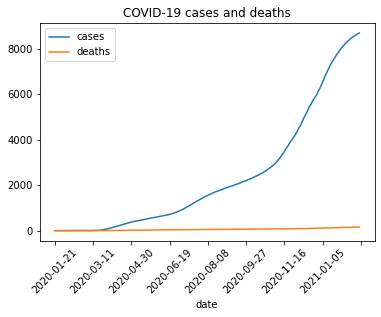

In [28]:
# nytdate.plot(x='date',y=['cases','deaths']) # return error

nytdate.plot(y=['cases','deaths'],use_index = True, title="COVID-19 cases and deaths")
plt.xticks(rotation = 45)

What's going on with the `index`? 

Index is like an address, that's how any data point across the dataframe or series can be accessed. Rows and columns both have indexes, rows indices are called as index and for columns its general column names.

In [29]:
nytdate.head(3)

,cases,deaths
date,,
2020-01-21,1.0,0.0
2020-01-22,1.0,0.0
2020-01-23,1.0,0.0


A simple way to do reset the index:

In [30]:
nytdate=nytdate.reset_index()

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 11 Text major ticklabel objects>)

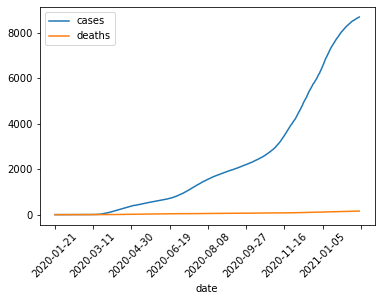

In [31]:
nytdate.plot(x='date',y=['cases','deaths'])
plt.xticks(rotation = 45)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 11 Text major ticklabel objects>)

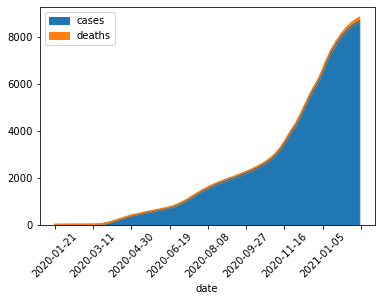

In [32]:
nytdate.plot.area(x='date',y=['cases','deaths'])
plt.xticks(rotation = 45)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 11 Text major ticklabel objects>)

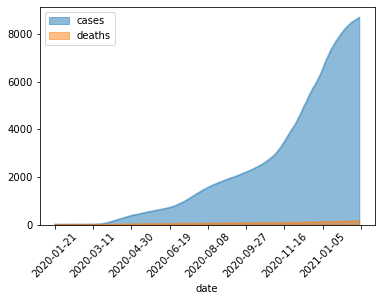

In [33]:
nytdate.plot.area(x='date',y=['cases','deaths'], stacked = False)
plt.xticks(rotation = 45) 

# Semi-Transparent, unstacked plot

## 2.2. Box Plot

In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending from the boxes (named whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points. Box plots are non-parametric: they display variation in samples of a statistical population without making any assumptions of the underlying statistical distribution (though Tukey's boxplot assumes symmetry for the whiskers and normality for their length). 

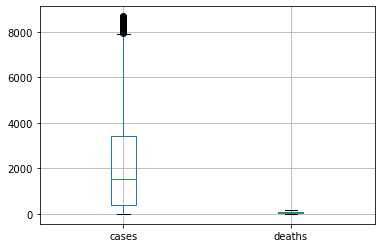

In [34]:
nytdate.boxplot(column=["cases","deaths"])

This is not a good plot, because outliers, plotted as individual points, are not clear enough. The comparison between cases and deaths are not in scale.

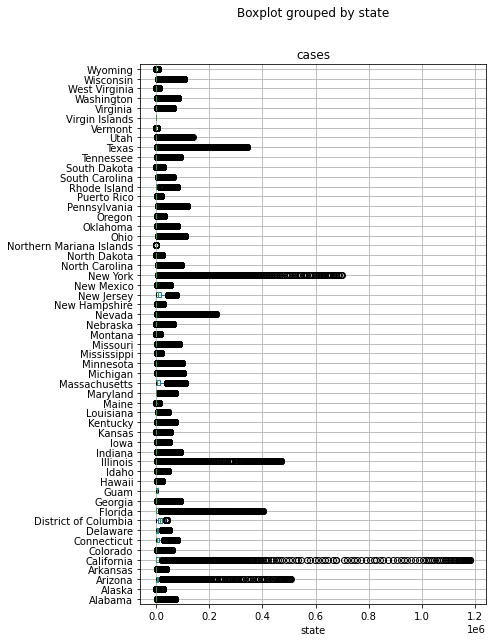

In [35]:
nyt_pddata.boxplot(column=["cases"],by='state', vert=False, figsize=(6,10))

This could be a signal that using the level of cases may have too many outliers. Let's try log of cases instead.

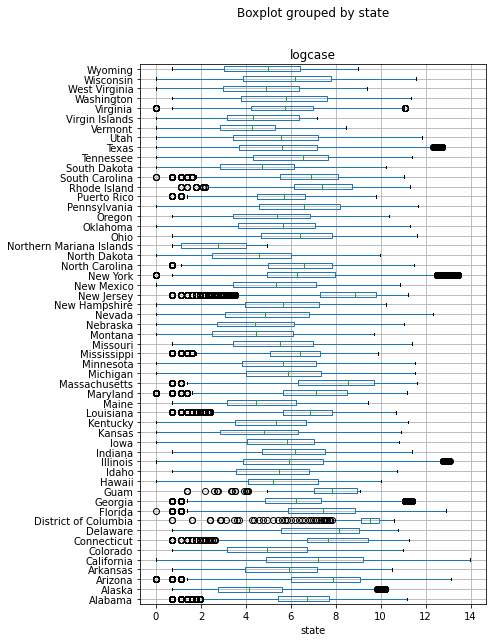

In [36]:
# Recall
nyt_pddata['logcase'] = np.log(nyt_pddata['cases'] + 1)
nyt_pddata.boxplot(column=["logcase"],by='state', vert=False, figsize=(6,10))

# The increasing speed of the cases are relatively balanced for all states.

This is suggesting that log case is a better indicator for analysis. 

## 2.3. Scatter Plot

In [37]:
cases_tah.head(5)

,geoid,county,state,cases,deaths,date,dwell_time,logcase
0,1001,Autauga,AL,0,0,2020-01-01,929.95764,0.0
1,1003,Baldwin,AL,0,0,2020-01-01,857.86395,0.0
2,1005,Barbour,AL,0,0,2020-01-01,788.39636,0.0
3,1007,Bibb,AL,0,0,2020-01-01,913.77106,0.0
4,1009,Blount,AL,0,0,2020-01-01,956.05914,0.0


In [38]:
cases_tah['logcase'] = np.log(cases_tah['cases'] + 1)
cases_tah['logdeath'] = np.log(cases_tah['deaths'] + 1)

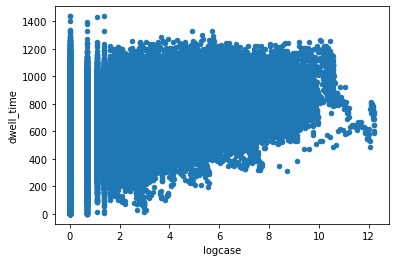

In [39]:
cases_tah.plot.scatter(x='logcase',y='dwell_time')

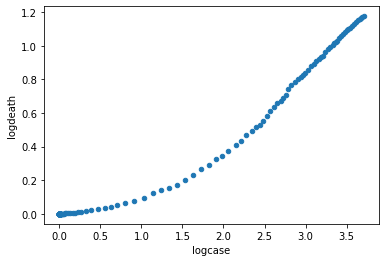

In [40]:
cases_tah.groupby(['date']).mean().plot.scatter(x='logcase',y='logdeath')

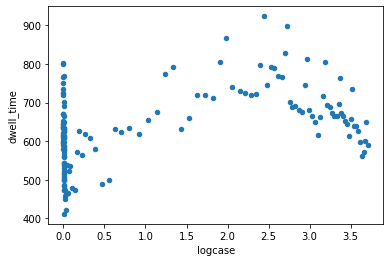

In [41]:
cases_tah.groupby(['date']).mean().plot.scatter(x='logcase',y='dwell_time')

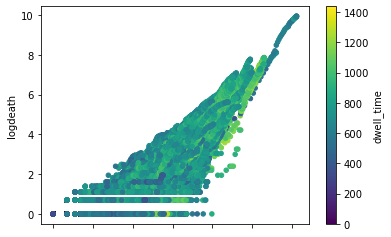

In [42]:
cases_tah.plot.scatter(x='logcase',y='logdeath',c='dwell_time',colormap='viridis')
# viridis is the most commonly used palettes

## 2.4. Bar Plot

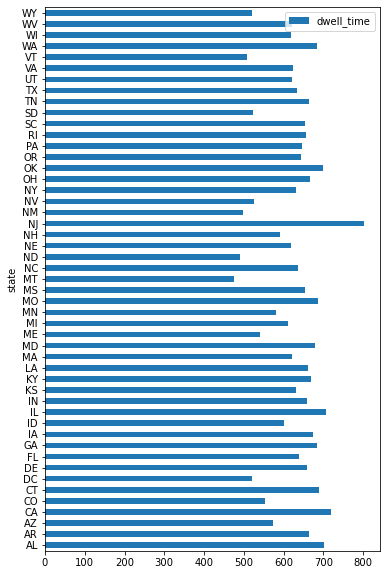

In [43]:
# error # cases_tah.groupby(['state']).mean().plot.barh('state','dwell_time')

cases_tah.groupby(['state']).mean().reset_index().plot.barh('state','dwell_time', figsize=(6,10))

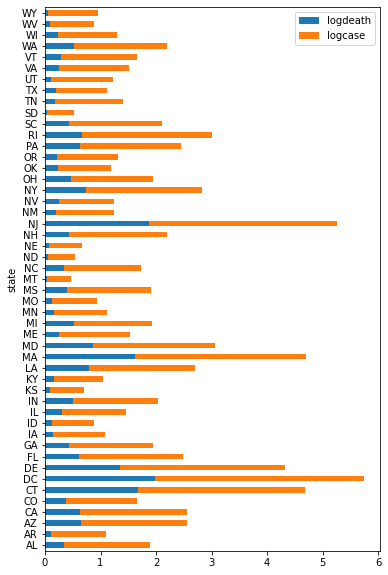

In [44]:
cases_tah.groupby(['state']).mean().reset_index().plot.barh('state',['logdeath','logcase'], 
                                                            figsize=(6,10),stacked=True)

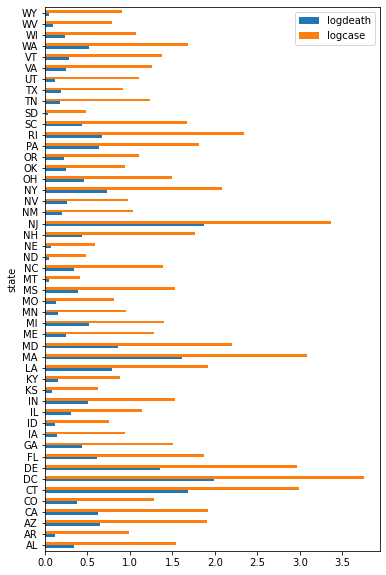

In [45]:
cases_tah.groupby(['state']).mean().reset_index().plot.barh('state',['logdeath','logcase'], 
                                                            figsize=(6,10))

## 2.5. Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9f99d6eb0>]],
      dtype=object)

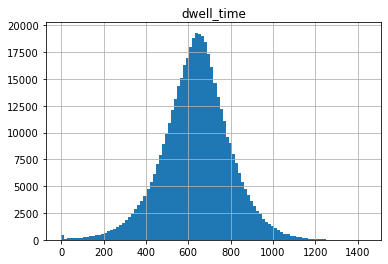

In [46]:
cases_tah.hist(column='dwell_time',bins=100)

X-axis: The X-axis are intervals that show the scale of values which the measurements fall under.
Y-axis: The Y-axis shows the number of times that the values occurred within the intervals set by the X-axis.
Creating a histogram provides a visual representation of data distribution. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9f9a39d90>,
      dtype=object)

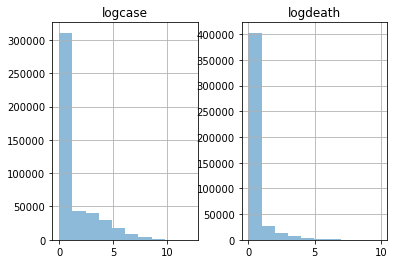

In [47]:
cases_tah[['logcase','logdeath']].hist(alpha=0.5)

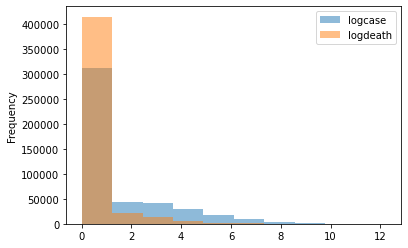

In [48]:
cases_tah[['logcase','logdeath']].plot.hist(alpha=0.5)

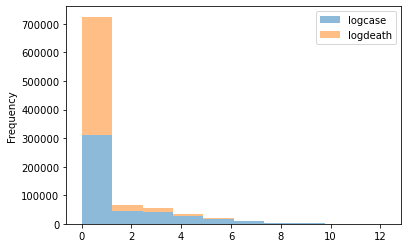

In [49]:
cases_tah[['logcase','logdeath']].plot.hist(alpha=0.5, stacked=True)

We can also stack different months' dwell time layer by layer.
Another good stack would be the POI data

In [50]:
poidata = pd.read_csv('YData_SDS177/poi_vpc.csv')

In [51]:
poidata.head(3)

,date,geoid,dvc7225,dvc7139,dvc4461,dvc4531,dvc4511,dvc4471,dvc7121,dvc4539,...,dvc7131,dvc4246,dvc4244,dvc4238,dvc4242,dvc4239,dvc4453,dvc4441,dvc4451,dvc4523
0,11apr2020,1001,0.227962,0.014729,0.017806,0.003517,0.019345,0.068587,0.009672,0.017366,...,0.0,0.0,0.0,0.0,0.0,0.00022,0.001539,0.018905,0.105738,0.164212
1,02apr2020,1001,0.236482,0.018622,0.043078,0.004039,0.016827,0.074938,0.010545,0.019520,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.002244,0.021539,0.089298,0.140453
2,24apr2020,1001,0.321203,0.027021,0.038788,0.007845,0.019612,0.097407,0.009806,0.025496,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.003269,0.020702,0.071693,0.157769


Recall the selected industries in the homework:

| NAICS | Industry    |
|------ |-------------|
| 4451 | grocery |
| 4461 | healthcare  |
| 4471 | gasoline   |
| 4522 | department |
| 7121 | museums |

In [52]:
poi5 = poidata[["date", "geoid", "dvc4451", "dvc4461", "dvc4471", "dvc4522", "dvc7121"]]
poi5 = poi5.rename(columns={"dvc4451":"grocery", 
                          "dvc4461":"healthcare",
                          "dvc4471":"gasoline",
                          "dvc4522":"department stores",
                          "dvc7121":"museums"})
poi5.head(3)

,date,geoid,grocery,healthcare,gasoline,department stores,museums
0,11apr2020,1001,0.105738,0.017806,0.068587,0.001978,0.009672
1,02apr2020,1001,0.089298,0.043078,0.074938,0.001571,0.010545
2,24apr2020,1001,0.071693,0.038788,0.097407,0.003051,0.009806


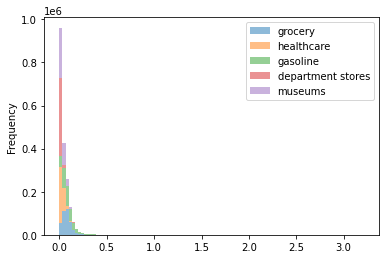

In [53]:
poi5[["grocery","healthcare","gasoline","department stores","museums"]].plot.hist(alpha=0.5, bins = 100,stacked = True)

In [54]:
poi5.date = pd.to_datetime(poi5.date)
poi5_select = poi5[poi5['date']>='2020-3-1']
poi5_select.sort_values(by = 'date', ascending = True) 

,date,geoid,grocery,healthcare,gasoline,department stores,museums
177526,2020-03-01,29023,0.088403,0.024161,0.069926,0.036953,0.039795
92611,2020-03-01,18167,0.084072,0.015237,0.097904,0.035660,0.030365
309147,2020-03-01,48163,0.084677,0.000000,0.242742,0.000000,0.079839
285081,2020-03-01,46083,0.028271,0.017192,0.045272,0.002101,0.016810
40872,2020-03-01,12053,0.089778,0.022742,0.051557,0.031910,0.016015
...,...,...,...,...,...,...,...
177152,2020-05-24,29017,0.114035,0.014620,0.092105,0.000000,0.000000
327665,2020-05-24,48473,0.050217,0.001900,0.271987,0.000000,0.061075
51931,2020-05-24,13105,0.104167,0.014137,0.048363,0.000000,0.009673
327545,2020-05-24,48471,0.065984,0.010773,0.113116,0.029895,0.005656


In [55]:
poi5_select2 = poi5[poi5['date']<'2020-3-1']
poi5_select2.describe()

,geoid,grocery,healthcare,gasoline,department stores,museums
count,109201.000000,109201.000000,109201.000000,109201.000000,109201.000000,109201.000000
mean,31370.175117,0.065877,0.028815,0.094335,0.008388,0.034761
std,16252.812616,0.039999,0.026302,0.093793,0.013784,0.038909
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19031.000000,0.040625,0.012384,0.047964,0.000000,0.008596
50%,30019.000000,0.062044,0.025132,0.075630,0.000000,0.025605
75%,46105.000000,0.085017,0.039130,0.114744,0.013660,0.048574
max,78010.000000,0.700508,0.769716,2.455882,0.343931,0.819574


In [56]:
poi5_select.describe()

# Compare before and after. We can also compare states in a difference-in-difference format.

,geoid,grocery,healthcare,gasoline,department stores,museums
count,272838.000000,272838.000000,272838.000000,272838.000000,272838.000000,272838.000000
mean,31375.524949,0.077121,0.025820,0.105184,0.006921,0.030301
std,16246.355809,0.045339,0.021646,0.117105,0.012202,0.032214
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19033.000000,0.048301,0.011050,0.050382,0.000000,0.008048
50%,30019.000000,0.073394,0.022908,0.081956,0.000000,0.023581
75%,46105.000000,0.099896,0.035470,0.126968,0.010608,0.043204
max,78010.000000,1.000000,0.398281,3.212121,0.281152,1.517241
